In [294]:
# Importando as bibliotecas utilizados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2

In [295]:
# Leitura dos dados deste DF
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [296]:
df.count().sort_values()
df.isna().sum().sort_values()

Date                 0
Location             0
MaxTemp           1261
MinTemp           1485
Temp9am           1767
WindSpeed9am      1767
Humidity9am       2654
WindSpeed3pm      3062
Rainfall          3261
RainToday         3261
RainTomorrow      3267
Temp3pm           3609
WindDir3pm        4228
Humidity3pm       4507
WindGustSpeed    10263
WindGustDir      10326
WindDir9am       10566
Pressure3pm      15028
Pressure9am      15065
Cloud9am         55888
Cloud3pm         59358
Evaporation      62790
Sunshine         69835
dtype: int64

In [297]:
print("O dataset possui {} linhas e {} colunas".format(df.shape[0], df.shape[1]))
df.isnull().sum()
quantidade_de_colunas_dropadas = 0
# Definindo a porcentagem máxima de valores nulos permitida
media_porcentagem_nulos_df = df.isna().mean().mean() 
print(media_porcentagem_nulos_df)
lista_de_removidos = list()

# Loop pelas colunas do DataFrame
for coluna in df.columns:
    # Calculando a porcentagem de valores nulos na coluna
    porcentagem_nulos = df[coluna].isnull().sum() / len(df)
    print(f"Coluna {coluna} não eliminada porcentagem de nulos: {porcentagem_nulos:.2%} de valores nulos.")
    # Verificando se a porcentagem de valores nulos na coluna é maior ou igual ao limite máximo permitido
    if porcentagem_nulos >= media_porcentagem_nulos_df:
        # Imprimindo mensagem informando que a coluna será eliminada
        print(f"Coluna {coluna} será eliminada por conter {porcentagem_nulos:.2%} de valores nulos.")
        # Removendo a coluna do DataFrame
        df.drop(columns=[coluna], inplace=True)
        lista_de_removidos.append(coluna)
        # Calculando quantas colunas foram dropadas do dataframe
        quantidade_de_colunas_dropadas = quantidade_de_colunas_dropadas + 1
print("O dataset possui {} linhas e {} colunas".format(df.shape[0], df.shape[1]))
print(lista_de_removidos)

O dataset possui 145460 linhas e 23 colunas
0.10259745694319072
Coluna Date não eliminada porcentagem de nulos: 0.00% de valores nulos.
Coluna Location não eliminada porcentagem de nulos: 0.00% de valores nulos.
Coluna MinTemp não eliminada porcentagem de nulos: 1.02% de valores nulos.
Coluna MaxTemp não eliminada porcentagem de nulos: 0.87% de valores nulos.
Coluna Rainfall não eliminada porcentagem de nulos: 2.24% de valores nulos.
Coluna Evaporation não eliminada porcentagem de nulos: 43.17% de valores nulos.
Coluna Evaporation será eliminada por conter 43.17% de valores nulos.
Coluna Sunshine não eliminada porcentagem de nulos: 48.01% de valores nulos.
Coluna Sunshine será eliminada por conter 48.01% de valores nulos.
Coluna WindGustDir não eliminada porcentagem de nulos: 7.10% de valores nulos.
Coluna WindGustSpeed não eliminada porcentagem de nulos: 7.06% de valores nulos.
Coluna WindDir9am não eliminada porcentagem de nulos: 7.26% de valores nulos.
Coluna WindDir3pm não eliminad

In [298]:
df = df.dropna(how='any')
df.shape

(121790, 17)

In [299]:
df.isna().sum().sort_values()

Date             0
Temp3pm          0
Temp9am          0
Humidity3pm      0
Humidity9am      0
WindSpeed3pm     0
WindSpeed9am     0
RainToday        0
WindDir3pm       0
WindGustSpeed    0
WindGustDir      0
Rainfall         0
MaxTemp          0
MinTemp          0
Location         0
WindDir9am       0
RainTomorrow     0
dtype: int64

In [300]:
# Remove as linhas que contêm pelo menos um valor nulo
df.dropna(how='any', inplace=True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No


In [301]:
# Substitui os valores da coluna para valores numericos para melhor avaliação dos resultados
df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace=True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,0,0


In [302]:
df = df.drop(columns=['Location', 'Date'])
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,0,0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,0,0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,0,0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,0,0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,0,0


In [303]:
#Mudando os valores categoricos e criando valores dummies para a materia

categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(df[col]))
df = pd.get_dummies(df, columns=categorical_columns)
df = df.astype(int)
df.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,17,32,1,41,7,20,82,33,17,29,...,0,0,0,0,0,0,0,0,0,0
5,14,29,0,56,19,24,55,23,20,28,...,0,0,0,0,0,0,0,1,0,0
6,14,25,0,50,20,24,49,19,18,24,...,0,0,0,0,0,0,1,0,0,0
7,7,26,0,35,6,17,48,19,16,25,...,0,0,0,0,1,0,0,0,0,0
8,9,31,0,80,7,28,42,9,18,30,...,0,0,0,1,0,0,0,0,0,0


In [304]:
# Deixando standard os dados da tabela
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,0.609756,0.692308,0.002725,0.265625,0.058824,0.211765,0.82,0.33,0.510638,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.536585,0.634615,0.000000,0.382812,0.200000,0.258824,0.55,0.23,0.574468,0.647059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.536585,0.557692,0.000000,0.335938,0.211765,0.258824,0.49,0.19,0.531915,0.568627,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.365854,0.576923,0.000000,0.218750,0.047059,0.176471,0.48,0.19,0.489362,0.588235,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.414634,0.673077,0.000000,0.570312,0.058824,0.305882,0.42,0.09,0.531915,0.686275,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.512195,0.653846,0.002725,0.164062,0.152941,0.105882,0.58,0.27,0.574468,0.647059,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [305]:
# Utilizando SelectKBest para pegar os features mais importantes
X = df.loc[:,df.columns!='RainTomorrow']
y = df[['RainTomorrow']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Humidity3pm', 'RainToday'], dtype='object')


c:\Users\vhcla\faculdade\redes-neurais-trabalho-final\venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matriz de confusão:
 [[27257  1267]
 [ 4712  3301]]
Acurácia do modelo: 0.8363576648329091


Text(0.5, 36.72222222222221, 'Predicted label')

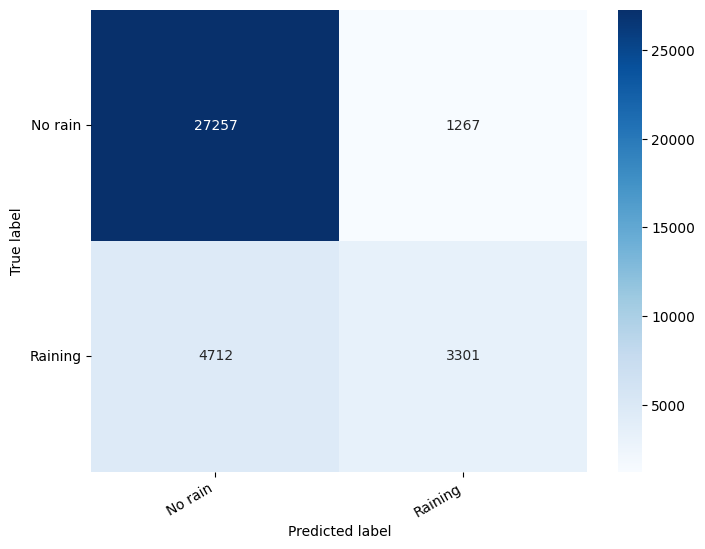

In [306]:

X = df[['Humidity3pm','Rainfall','RainToday']]
y = df[['RainTomorrow']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# instantiate the model
logreg = LogisticRegression(C=100 ,solver='liblinear', random_state=0)
# fit the model
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Matriz de confusão:\n", conf_matrix)
print("Acurácia do modelo:", accuracy)
# print("Revogação das Classes\n", class_report)
classes = ['No rain', 'Raining']
df_cm = pd.DataFrame(conf_matrix, index=classes, columns=classes)

# Plota a matriz de confusão usando o seaborn
plt.figure(figsize=(8, 6))
hmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')

# Configurações adicionais do gráfico
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
        

In [307]:
logreg.predict_proba(X_test)[:,0]

array([0.80116374, 0.93736646, 0.86654429, ..., 0.9553679 , 0.9776731 ,
       0.97341461])

In [308]:
logreg.predict_proba(X_test)[:,1]

array([0.19883626, 0.06263354, 0.13345571, ..., 0.0446321 , 0.0223269 ,
       0.02658539])

In [309]:
print('Treinamento: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Teste Set: {:.4f}'.format(logreg.score(X_test, y_test)))

Treinamento: 0.8331
Teste Set: 0.8364
